In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


# Data analysis
Here I will extract some interesting information from the data, and try to find some patterns.

In [2]:
rating = pd.read_csv('../data/interim/rating.csv')
users = pd.read_csv('../data/interim/user.csv')
movies = pd.read_csv('../data/interim/movie.csv')

In [3]:
rating

,user_id,item_id,weight,datetime
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16
...,...,...,...,...
99995,880,476,3,1997-11-22 05:10:44
99996,716,204,5,1997-11-17 19:39:03
99997,276,1090,1,1997-09-20 22:49:55
99998,13,225,2,1997-12-17 22:52:36


In [93]:
movies.describe()

,movie_id,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.00000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
mean,841.500000,0.001189,0.149227,0.080262,0.024970,0.072533,0.300238,0.064804,0.029727,0.431034,0.01308,0.014269,0.054697,0.033294,0.036266,0.146849,0.060048,0.149227,0.042212,0.016052
std,485.695893,0.034473,0.356418,0.271779,0.156081,0.259445,0.458498,0.246253,0.169882,0.495368,0.11365,0.118632,0.227455,0.179456,0.187008,0.354061,0.237646,0.356418,0.201131,0.125714
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,421.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,841.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1261.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [97]:
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


## Distribution of ratings

<Axes: xlabel='weight', ylabel='count'>

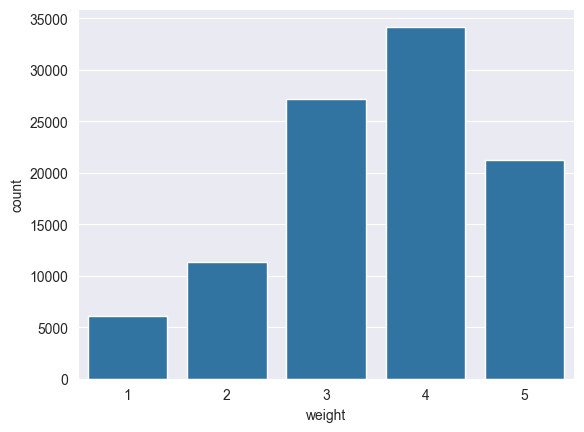

In [4]:
sns.countplot(x="weight", data=rating)

We have a lot of ratings of 4 and 5, and very few of 1 and 2. This can be a problem for recommender systems, because we don't have enough information about the movies that users don't like.

## Item Long Tail graph

In [5]:
import numpy as np

<Axes: ylabel='count'>

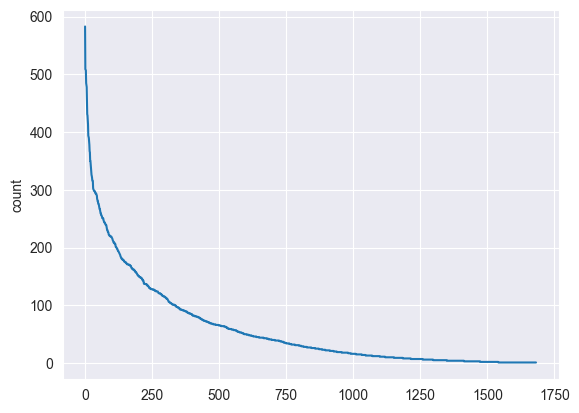

In [25]:
ratings_per_movie = rating.groupby('item_id').count()['user_id'].sort_values(ascending=False).rename('count')
sns.lineplot(x=np.arange(len(ratings_per_movie)), y=ratings_per_movie)

We can see that the number of ratings per movie decreases very fast

## User Long Tail graph

<Axes: ylabel='count'>

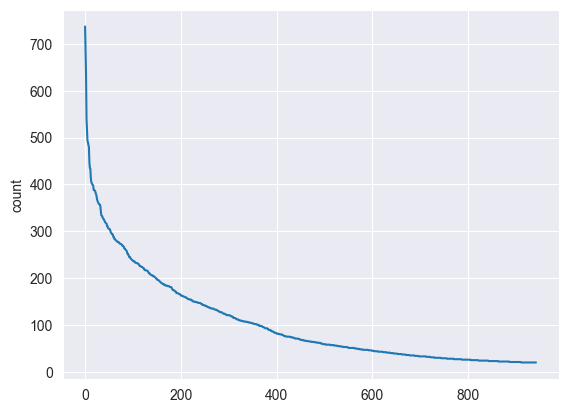

In [31]:
ratings_per_user = rating.groupby('user_id').count()['item_id'].sort_values(ascending=False).rename('count')
sns.lineplot(x=np.arange(len(ratings_per_user)), y=ratings_per_user)

Almost the same thing happens with the number of ratings per user

## Genre interested users

In [54]:
genres = movies.columns[-18:]

In [52]:
merged = rating.merge(movies, left_on='item_id', right_on='movie_id')

<Axes: >

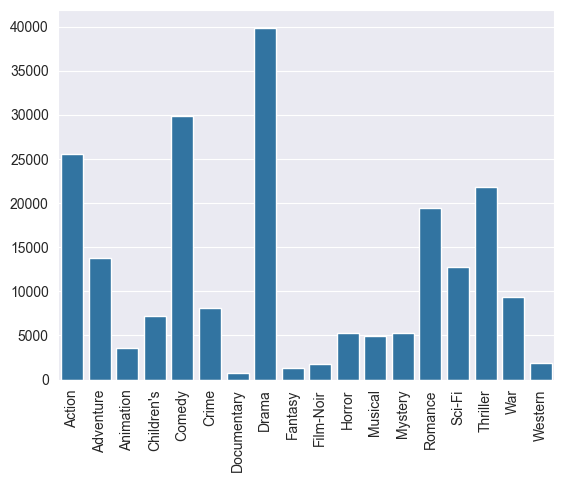

In [101]:
genre_popularity = {}
for e in genres:
    genre_popularity[e] = len(merged[merged[e] == 1])

plt.xticks(rotation=90)
sns.barplot(x=list(genre_popularity.keys()), y=list(genre_popularity.values()))
    

## Co-occurrence matrix

In [55]:
merged[merged['Action'] == 1]

,user_id,item_id,weight,datetime,movie_id,movie_title,release_date,unknown,Action,Adventure,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
828,115,265,2,1997-12-03 17:51:28,265,"Hunt for Red October, The (1990)",01-Jan-1990,0,1,0,...,0,0,0,0,0,0,0,1,0,0
829,41,265,3,1998-03-23 21:04:02,265,"Hunt for Red October, The (1990)",01-Jan-1990,0,1,0,...,0,0,0,0,0,0,0,1,0,0
830,94,265,4,1998-04-04 20:31:29,265,"Hunt for Red October, The (1990)",01-Jan-1990,0,1,0,...,0,0,0,0,0,0,0,1,0,0
831,244,265,4,1997-11-27 04:57:14,265,"Hunt for Red October, The (1990)",01-Jan-1990,0,1,0,...,0,0,0,0,0,0,0,1,0,0
832,1,265,4,1997-11-03 07:34:01,265,"Hunt for Red October, The (1990)",01-Jan-1990,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99931,835,1673,3,1998-03-27 21:27:03,1673,Mirage (1995),01-Jan-1995,0,1,0,...,0,0,0,0,0,0,0,1,0,0
99945,787,1433,3,1998-03-04 02:39:41,1433,Men of Means (1998),01-Jan-1997,0,1,0,...,0,0,0,0,0,0,0,0,0,0
99946,206,1433,1,1998-02-22 20:40:49,1433,Men of Means (1998),01-Jan-1997,0,1,0,...,0,0,0,0,0,0,0,0,0,0
99956,405,1556,1,1998-01-23 10:00:35,1556,Condition Red (1995),01-Jan-1995,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [80]:
genre_sets = {}
for e in genres:
    users_for_genre = set(merged[merged[e] == 1]["user_id"])
    genre_sets[e] = users_for_genre

In [82]:
# matrix with intersections
matrix = np.zeros((len(genres), len(genres)))
for i, genre1 in enumerate(genres):
    for j, genre2 in enumerate(genres):
        matrix[i, j] = len(genre_sets[genre1].intersection(genre_sets[genre2]))
    matrix[i] /= matrix[i,i]



In [83]:
matrix = pd.DataFrame(matrix, columns=genres, index=genres)

In [84]:
matrix

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Action,1.000000,0.958422,0.701493,0.855011,0.996802,0.969083,0.373134,1.0,0.545842,0.656716,0.839019,0.800640,0.952026,1.0,0.966951,0.994670,0.980810,0.523454
Adventure,0.997780,1.000000,0.721421,0.875694,0.996670,0.972253,0.382908,1.0,0.561598,0.655938,0.850166,0.806881,0.951165,1.0,0.980022,0.993341,0.985572,0.544950
Animation,0.998483,0.986343,1.000000,0.981791,0.998483,0.977238,0.441578,1.0,0.676783,0.684370,0.871017,0.895296,0.959029,1.0,0.990895,0.996965,0.995448,0.629742
Children's,0.996273,0.980124,0.803727,1.000000,0.998758,0.971429,0.403727,1.0,0.618634,0.662112,0.857143,0.840994,0.956522,1.0,0.976398,0.992547,0.991304,0.570186
Comedy,0.994681,0.955319,0.700000,0.855319,1.000000,0.970213,0.374468,1.0,0.544681,0.656383,0.837234,0.801064,0.952128,1.0,0.962766,0.993617,0.980851,0.521277
Crime,0.994530,0.958425,0.704595,0.855580,0.997812,1.000000,0.381838,1.0,0.549234,0.670678,0.847921,0.803063,0.959519,1.0,0.966083,0.996718,0.984683,0.530635
Documentary,0.994318,0.980114,0.826705,0.923295,1.000000,0.991477,1.000000,1.0,0.710227,0.795455,0.875000,0.880682,0.965909,1.0,0.980114,0.991477,0.994318,0.713068
Drama,0.994698,0.955461,0.698834,0.853659,0.996819,0.969247,0.373277,1.0,0.542948,0.655355,0.836691,0.799576,0.951220,1.0,0.962884,0.993637,0.980912,0.520679
Fantasy,1.000000,0.988281,0.871094,0.972656,1.000000,0.980469,0.488281,1.0,1.000000,0.753906,0.917969,0.906250,0.972656,1.0,0.994141,0.994141,0.994141,0.714844
Film-Noir,0.996764,0.956311,0.729773,0.862460,0.998382,0.991909,0.453074,1.0,0.624595,1.000000,0.915858,0.862460,0.990291,1.0,0.977346,1.000000,0.988673,0.637540


<Axes: >

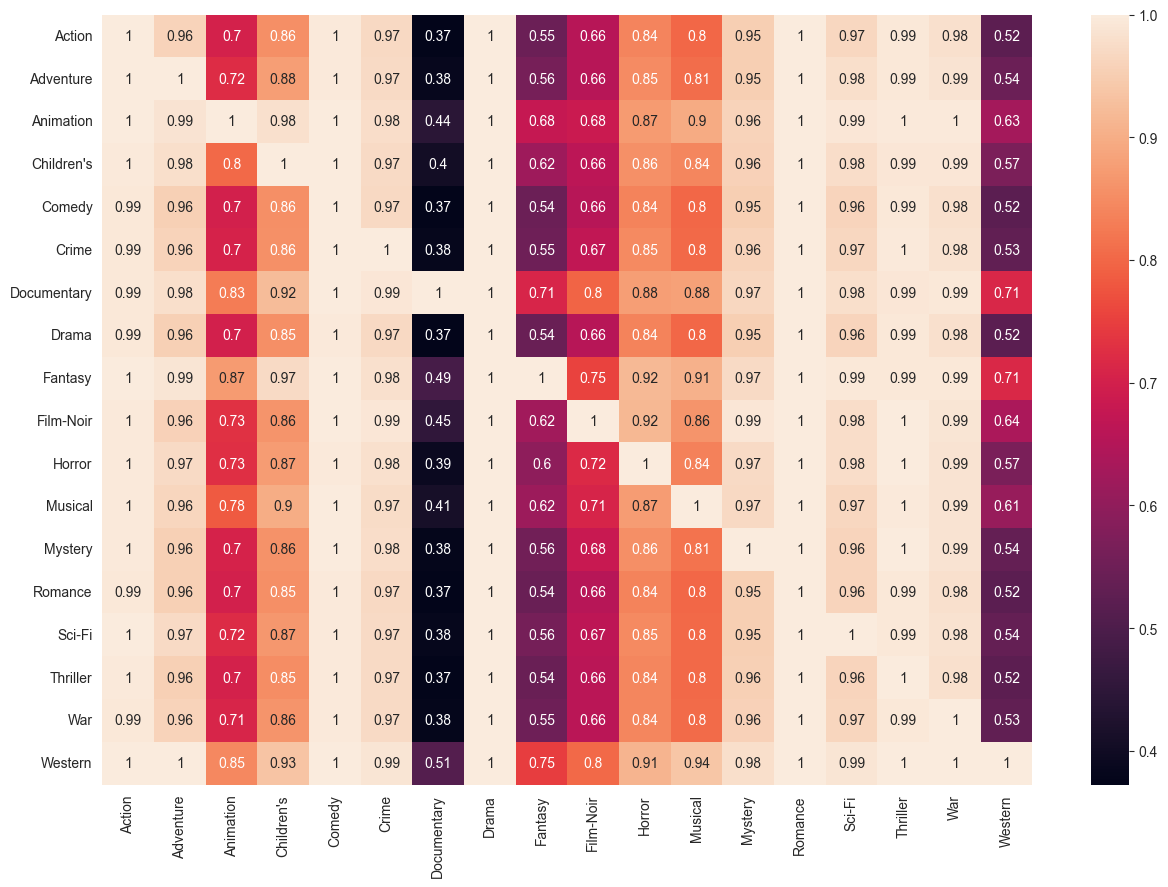

In [87]:
plt.figure(figsize=(15, 10))
sns.heatmap(matrix, annot=True)